In [ ]:
!pip install -q kaggle

In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seneshgamage2000","key":"80b2606e24e18c313d5ef9c8c73edbab"}'}

In [11]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600  ~/.kaggle/kaggle.json

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


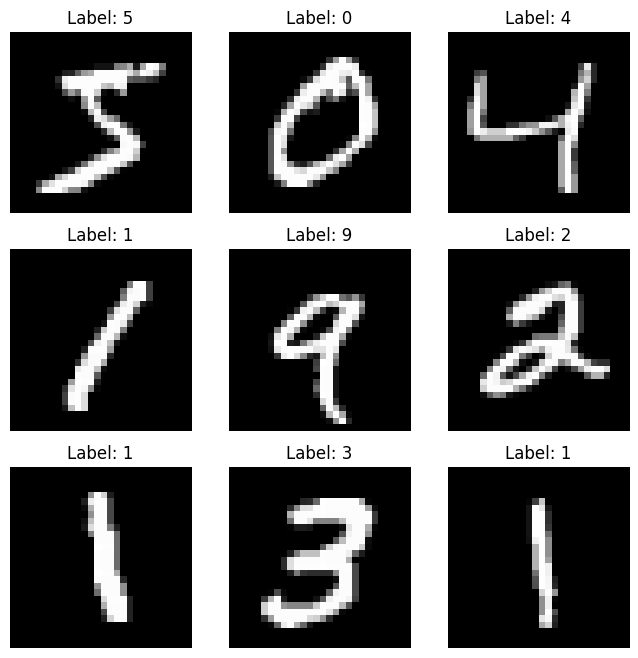

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 Train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 Train shape: (50000, 32, 32, 3)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(x_train_c10, y_train_c10,
                    epochs=20,
                    validation_split=0.2,
                    batch_size=64)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.3075 - loss: 1.8642 - val_accuracy: 0.5004 - val_loss: 1.3909
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.5244 - loss: 1.3336 - val_accuracy: 0.5588 - val_loss: 1.2461
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.5964 - loss: 1.1399 - val_accuracy: 0.6520 - val_loss: 0.9920
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 86ms/step - accuracy: 0.6440 - loss: 1.0048 - val_accuracy: 0.6355 - val_loss: 1.0447
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6787 - loss: 0.9118 - val_accuracy: 0.6827 - val_loss: 0.9191
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7077 - loss: 0.8390 - val_accuracy: 0.6950 - val_loss: 0.8759
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.7270 - loss: 0.7690 - val_accuracy: 0.6950 - val_loss: 0.8824
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7491 - loss: 0.7159 - 

In [7]:
model.save('basic_cnn_cifar10.keras')
print("Model saved successfully!")

Model saved successfully!


In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train_c10)


aug_history = model.fit(
    datagen.flow(x_train_c10, y_train_c10, batch_size=64),
    epochs=15,
    validation_data=(x_test_c10, y_test_c10)
)


model.save('augmented_cnn_cifar10.keras')
print("Augmented model saved successfully!")

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 117ms/step - accuracy: 0.6342 - loss: 1.1050 - val_accuracy: 0.7024 - val_loss: 0.8968
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 117ms/step - accuracy: 0.6624 - loss: 0.9789 - val_accuracy: 0.7051 - val_loss: 0.9097
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.6778 - loss: 0.9337 - val_accuracy: 0.7202 - val_loss: 0.8433
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.6934 - loss: 0.8947 - val_accuracy: 0.7197 - val_loss: 0.8242
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.6939 - loss: 0.8743 - val_accuracy: 0.7459 - val_loss: 0.7405
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.7055 - loss: 0.8517 - val_accuracy: 0.7171 - val_loss: 0.8221
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 115ms/step - accuracy: 0.7088 - loss: 0.8417 - val_accuracy: 0.7494 - val_loss: 0.7416
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.7168 - loss: 0.8275 - v

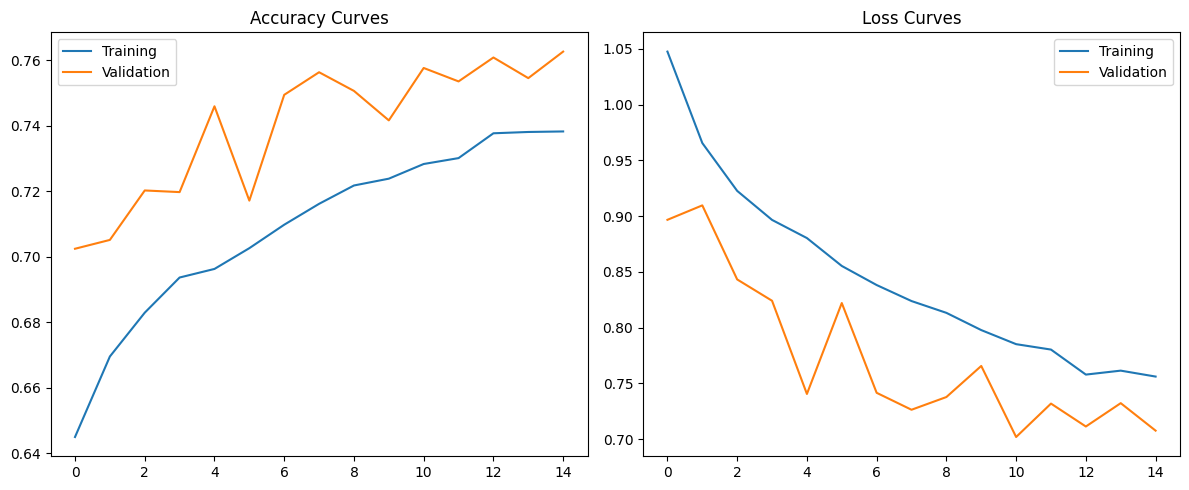

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(aug_history.history['accuracy'], label='Training')
plt.plot(aug_history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(aug_history.history['loss'], label='Training')
plt.plot(aug_history.history['val_loss'], label='Validation')
plt.title('Loss Curves')
plt.legend()
plt.tight_layout()
plt.savefig('augmented_training_history.png')
plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

test_loss, test_acc = model.evaluate(x_test_c10, y_test_c10, verbose=0)
print(f'\nTest accuracy: {test_acc:.2%}')


Test accuracy: 76.26%


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


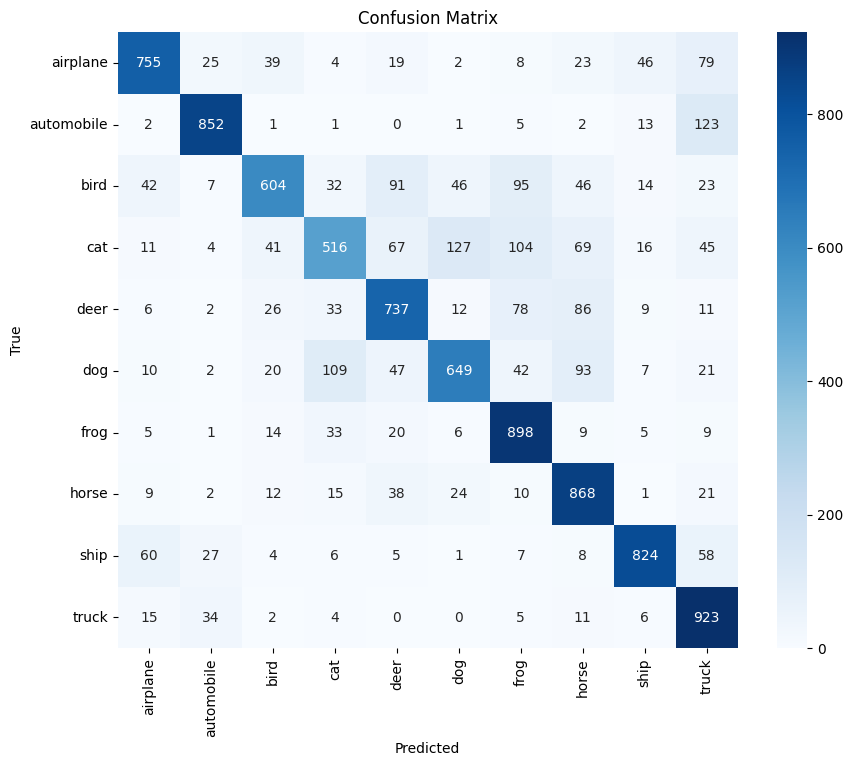


Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.76      0.79      1000
  automobile       0.89      0.85      0.87      1000
        bird       0.79      0.60      0.69      1000
         cat       0.69      0.52      0.59      1000
        deer       0.72      0.74      0.73      1000
         dog       0.75      0.65      0.69      1000
        frog       0.72      0.90      0.80      1000
       horse       0.71      0.87      0.78      1000
        ship       0.88      0.82      0.85      1000
       truck       0.70      0.92      0.80      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [11]:

y_pred = model.predict(x_test_c10)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_flat = y_test_c10.flatten()


cm = confusion_matrix(y_test_flat, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_classes, target_names=class_names))

In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


base_model = MobileNetV2(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet',
    alpha=0.35
)

base_model.trainable = False
print("MobileNetV2 base model loaded and frozen!")


/tmp/ipython-input-2902553403.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 base model loaded and frozen!


In [13]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
transfer_model = Model(inputs, outputs)

transfer_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

transfer_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_0.35_224            │ (None, 1, 1, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,466 (2.20 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 410,208 (1.56 MB)

In [14]:
transfer_history = transfer_model.fit(
    x_train_c10, y_train_c10,
    epochs=10,
    validation_split=0.2,
    batch_size=64
)


transfer_model.save('mobilenetv2_cifar10.keras')
print("Transfer learning model saved successfully!")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.3253 - loss: 1.9583 - val_accuracy: 0.3915 - val_loss: 1.7331
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4006 - loss: 1.7086 - val_accuracy: 0.4015 - val_loss: 1.7063
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4047 - loss: 1.6719 - val_accuracy: 0.4014 - val_loss: 1.6981
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.4160 - loss: 1.6425 - val_accuracy: 0.4094 - val_loss: 1.6766
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.4278 - loss: 1.6170 - val_accuracy: 0.4051 - val_loss: 1.6739
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4324 - loss: 1.5944 - val_accuracy: 0.4122 - val_loss: 1.6607
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.4359 - loss: 1.5700 - val_accuracy: 0.4142 - val_loss: 1.6560
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.4435 - loss: 1.5597 - 

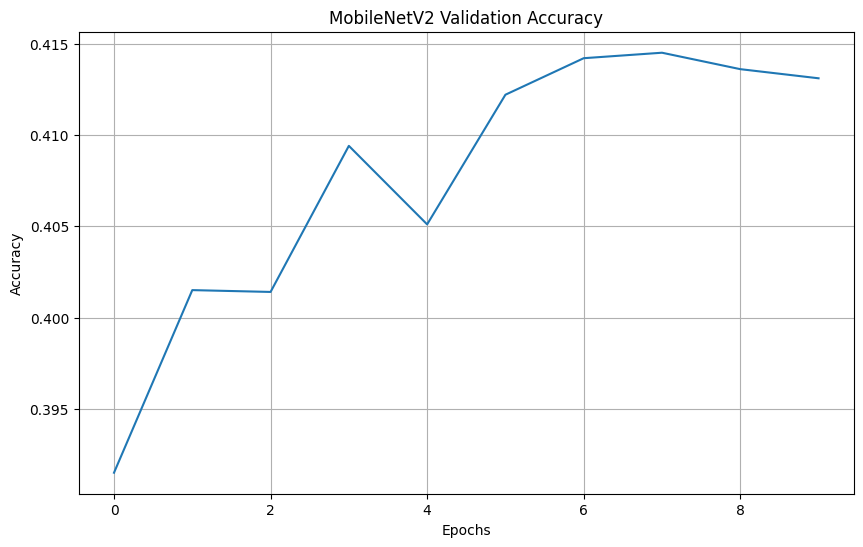

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(transfer_history.history['val_accuracy'])
plt.title('MobileNetV2 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('mobilenet_training.png')
plt.show()

In [16]:
transfer_test_loss, transfer_test_acc = transfer_model.evaluate(x_test_c10, y_test_c10, verbose=0)
print(f'\nTransfer Learning Test Accuracy: {transfer_test_acc:.2%}')


Transfer Learning Test Accuracy: 40.66%


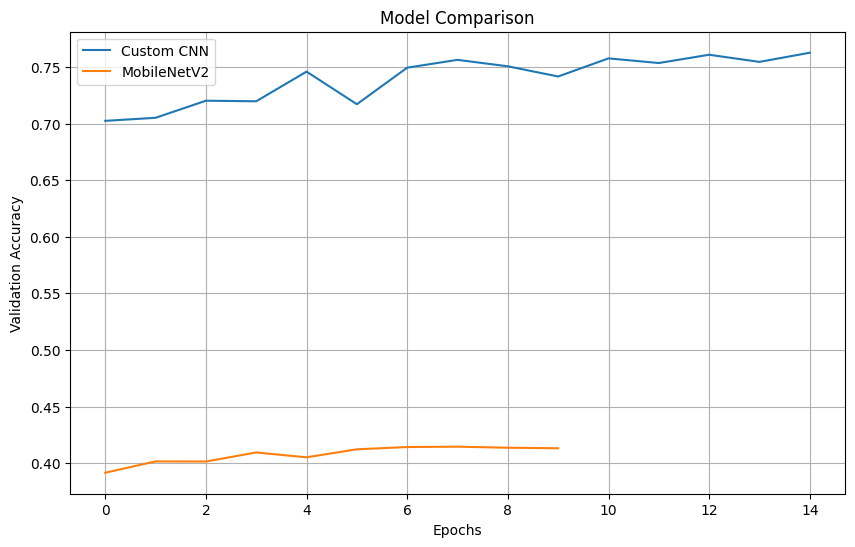

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(aug_history.history['val_accuracy'], label='Custom CNN')
plt.plot(transfer_history.history['val_accuracy'], label='MobileNetV2')
plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('model_comparison.png')
plt.show()

In [18]:
print("\nPerformance Comparison:")
print(f"Custom CNN: {test_acc:.2%}")
print(f"MobileNetV2: {transfer_test_acc:.2%}")
print(f"Improvement: {transfer_test_acc - test_acc:+.2%}")


Performance Comparison:
Custom CNN: 76.26%
MobileNetV2: 40.66%
Improvement: -35.60%


In [29]:
sample_images = x_test_c10[:8]
sample_preds = transfer_model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


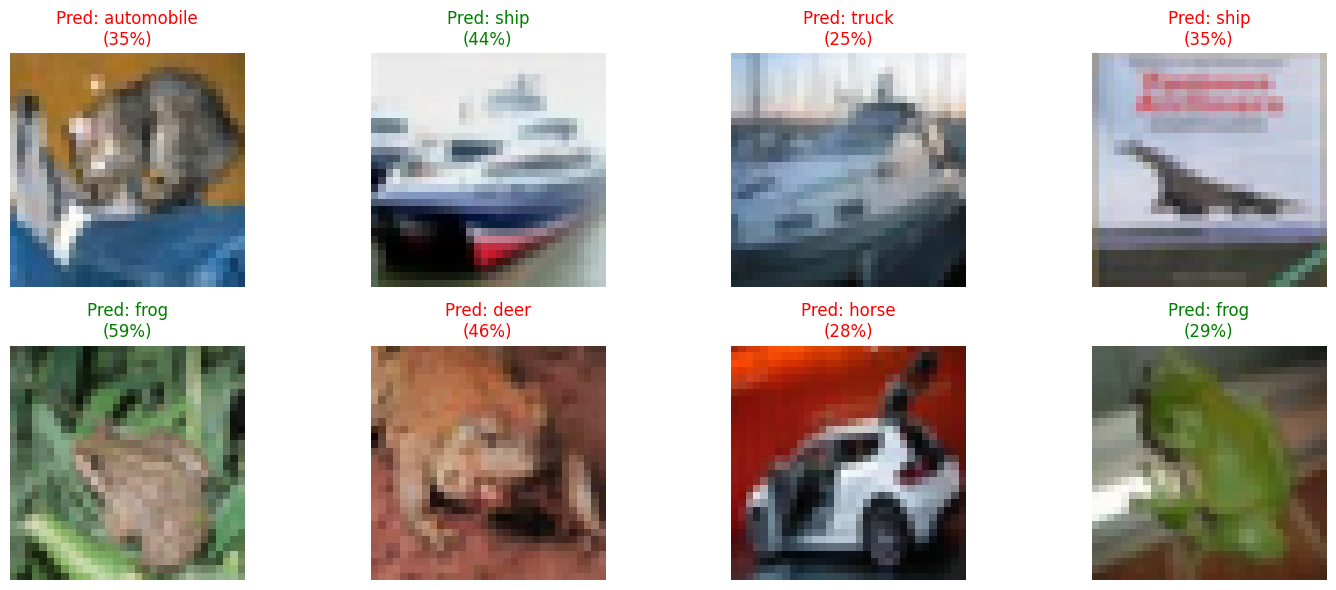

In [30]:
plt.figure(figsize=(15, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(sample_images[i])
    pred_class = class_names[np.argmax(sample_preds[i])]
    true_class = class_names[y_test_c10[i][0]]
    confidence = np.max(sample_preds[i])

    # Color coding: green correct, red incorrect
    color = 'green' if pred_class == true_class else 'red'
    plt.title(f"Pred: {pred_class}\n({confidence:.0%})", color=color)
    plt.axis('off')
plt.tight_layout()
plt.savefig('sample_predictions.png')
plt.show()

In [31]:
def live_demo(model, num_samples=10):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        idx = np.random.randint(0, len(x_test_c10))
        img = x_test_c10[idx]
        pred = model.predict(np.expand_dims(img, axis=0))
        pred_class = class_names[np.argmax(pred)]
        true_class = class_names[y_test_c10[idx][0]]
        confidence = np.max(pred)

        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2%}",
                  color='green' if pred_class == true_class else 'red')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('live_demo_snapshot.png')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


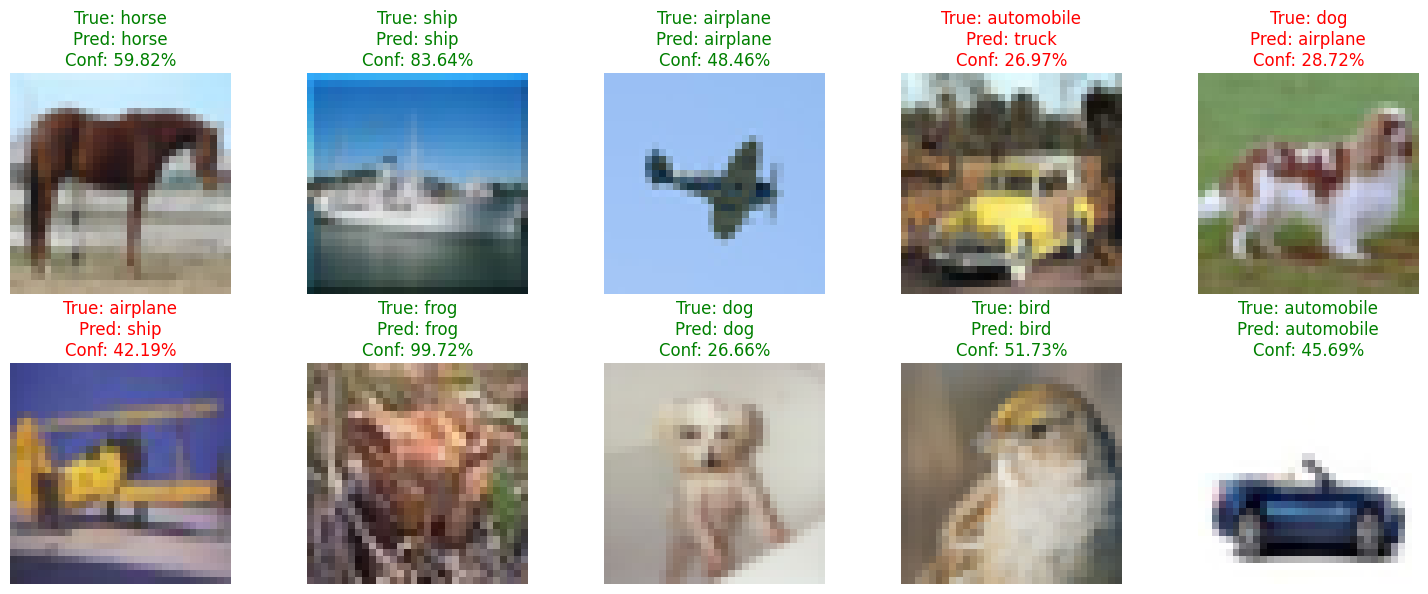

In [39]:
live_demo(transfer_model, num_samples=10)

In [23]:
!mkdir -p Vision-AI-Project/{notebooks,models,assets,scripts,results}

In [24]:
!mv *.keras Vision-AI-Project/models/
!mv *.png Vision-AI-Project/assets/
!mv *.ipynb Vision-AI-Project/notebooks/
!mv requirements.txt Vision-AI-Project/

mv: cannot stat '*.ipynb': No such file or directory
mv: cannot stat 'requirements.txt': No such file or directory


In [25]:
import pandas as pd
sample_images = x_test_c10[:10]
sample_preds = transfer_model.predict(sample_images)
predictions_df = pd.DataFrame({
    'image_index': range(10),
    'predicted_class': [class_names[np.argmax(p)] for p in sample_preds],
    'confidence': [np.max(p) for p in sample_preds],
    'true_class': [class_names[y[0]] for y in y_test_c10[:10]]
})
predictions_df.to_csv('Vision-AI-Project/results/sample_predictions.csv', index=False)


print("✅ GitHub Repository Structure Created!")
!tree Vision-AI-Project --charset=ascii

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
✅ GitHub Repository Structure Created!
/bin/bash: line 1: tree: command not found


In [26]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Create the directory if it doesn't exist
output_dir = '/content/drive/MyDrive/Vision-AI-Project/assets'
os.makedirs(output_dir, exist_ok=True)

print(f"Folder created at: {output_dir}")

Mounted at /content/drive
Folder created at: /content/drive/MyDrive/Vision-AI-Project/assets


In [27]:
import os

# Define the base directory in Google Drive
base_dir = '/content/drive/MyDrive/Vision-AI-Project'

# Create the subdirectories if they don't exist
os.makedirs(os.path.join(base_dir, 'models'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'assets'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'notebooks'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'scripts'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'results'), exist_ok=True)

print("Folders created successfully in Google Drive!")

Folders created successfully in Google Drive!
